In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy

In [93]:
#import AA from parent directory
from torchAA import torchAA
from helpers.callbacks import EarlyStop

In [102]:
mat = scipy.io.loadmat('data/NMR_mix_DoE.mat')


# Get X and Labels. Probably different for the other dataset, but i didn't check :)
X = mat.get('xData')
targets = mat.get('yData')
target_labels = mat.get('yLabels')
axis = mat.get("Axis")

In [105]:
targets
X

array([[  0, 100,   0],
       [  5,  95,   0],
       [ 10,  90,   0],
       [ 15,  85,   0],
       [ 20,  80,   0],
       [ 25,  75,   0],
       [ 30,  70,   0],
       [ 35,  65,   0],
       [ 40,  60,   0],
       [ 45,  55,   0],
       [ 50,  50,   0],
       [ 55,  45,   0],
       [ 60,  40,   0],
       [ 65,  35,   0],
       [ 70,  30,   0],
       [ 75,  25,   0],
       [ 80,  20,   0],
       [ 85,  15,   0],
       [ 90,  10,   0],
       [ 95,   5,   0],
       [100,   0,   0],
       [  0,  95,   5],
       [  5,  90,   5],
       [ 10,  85,   5],
       [ 15,  80,   5],
       [ 20,  75,   5],
       [ 25,  70,   5],
       [ 30,  65,   5],
       [ 35,  60,   5],
       [ 40,  55,   5],
       [ 45,  50,   5],
       [ 50,  45,   5],
       [ 55,  40,   5],
       [ 60,  35,   5],
       [ 65,  30,   5],
       [ 70,  25,   5],
       [ 75,  20,   5],
       [ 80,  15,   5],
       [ 85,  10,   5],
       [ 90,   5,   5],
       [ 95,   0,   5],
       [  0,  90

In [79]:
df = pd.read_csv("iris.csv")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [80]:
#make a dataframe with only the first 2 and last column
df = df.iloc[:, [0,1,4]]

In [81]:
# PC = PCA(n_components=2)
X = df.iloc[:,0:2].values
# remove the first column
# X = X[:,1:3]
# append the labels to the data
X_plot = np.append(X, df.iloc[:,2:3], axis=1)

In [82]:
X.T.shape

(2, 149)

In [83]:
#plot the data
#map the labels to colors
colors = {"Iris-setosa": "red", "Iris-versicolor": "blue", "Iris-virginica": "green"}
# plt.scatter(X_plot[:,0], X_plot[:,1], c=[colors[label] for label in X_plot[:,2]])
# plt.show()

In [84]:
#train the model
import torch
AA = torchAA(X.T, 3)

In [85]:
C, S = AA.fit(verbose=True, stopper=EarlyStop(patience=10, offset=-1e-5))

In [86]:
print(C.shape)
print(S.shape)
print(X.shape)

(149, 3)
(3, 149)
(149, 2)


In [87]:
A = np.matmul(X.T, C).T
rec = np.matmul(A.T, S)

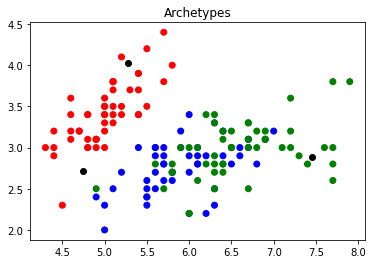

In [90]:
#plot the archetypes
plt.figure()

#matmul the archetypes with the data to get the reconstructed data
# A = np.matmul(C, X)
# recons = np.matmul(S, A)


plt.scatter(X[:,0], X[:,1], c=[colors[label] for label in X_plot[:,2]])


for vec in np.matmul(X.T, C).T:
    plt.scatter(vec[0], vec[1], c="black")

plt.title("Archetypes")
plt.show()